## 오디오 처리
### 오디오 형식과 인코딩
- WAV(형식)
- FLAC(형식, 인코딩)
- MP3(인코딩), ...

<br>

WAV(비압축), FLAC(무손실압축), MP3(손실 압축)

<br>

### 주요 용어
- Channel: 1(mono), 2(stereo)
- Sampling rate: 초당 얻은 표본의 수 (파동을 가로로 자름)
- Bit: 음 높이를 나눈 구간의 수

<br>
[EX] CD 음악: 2 Channel(Stereo), 44100Hz, 16Bit (1초를 44100 데이터로 자른 것)

## 실습 내용
- Kaggle에서 RAVDESS Emotional speech audio 데이터 다운받아 D:\Bigdata\RAVDESS에 저장
- Actor_01의 첫번째 파일 읽고 play 해보기
- RAVDESS에 있는 음성파일을 하나의 리스트로 만듦
- 첫번째 리스트 값(음성파일)에 대해 시각적으로 표시해보기
    - 시계열그림
    - spectrogram

### Actor1의 첫번째 파일 읽고 play 해보기
- wave: 파일 읽고 쓰기

In [4]:
import wave
import os

os.chdir('D:\Bigdata\RAVDESS\Actor_01')

In [5]:
음성파일 = '03-01-01-01-01-01-01.wav'
음성1 = wave.open('03-01-01-01-01-01-01.wav', 'r')

In [6]:
print(음성1.getnchannels())
print(음성1.getsampwidth())
print(음성1.getframerate())  # hz
print(음성1.getnframes())
print(음성1.getparams())

1
2
48000
158558
_wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=158558, comptype='NONE', compname='not compressed')


In [7]:
from IPython.display import Audio, display

In [8]:
display(Audio(음성파일))

### RAVDESS에 있는 음성파일을 하나의 리스트로 만듦
- 여러 음성 파일을 처리할 때 파일명들을 하나의 리스트로 묶어 처리하면 편리함

In [9]:
from glob import glob

In [10]:
음성묶음 = glob("D:\Bigdata\RAVDESS\*\*.wav")
print(음성묶음[0])

D:\Bigdata\RAVDESS\Actor_01\03-01-01-01-01-01-01.wav


In [11]:
display(Audio(음성묶음[0]))

### 첫번째 리스트 값(음성파일)에 대해 시각적으로 표시해보기
- 시계열그림
- spectrogram

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import librosa
import librosa.display

In [2]:
sns.set_theme(style = 'white', palette = None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [12]:
음성자료, 표집률 = librosa.load(음성묶음[0])
# 음성자료: nparray
print(f'음성자료: {음성자료[:10]}')
print(f'형태: {음성자료.shape}')
print(f'표집률: {표집률}')

음성자료: [ 5.3765390e-08 -2.1233145e-08 -6.0478342e-09  3.8985988e-08
 -7.6543131e-08  1.1907758e-07 -1.6708444e-07  2.2135782e-07
 -2.8319053e-07  3.5470680e-07]
형태: (72838,)
표집률: 22050


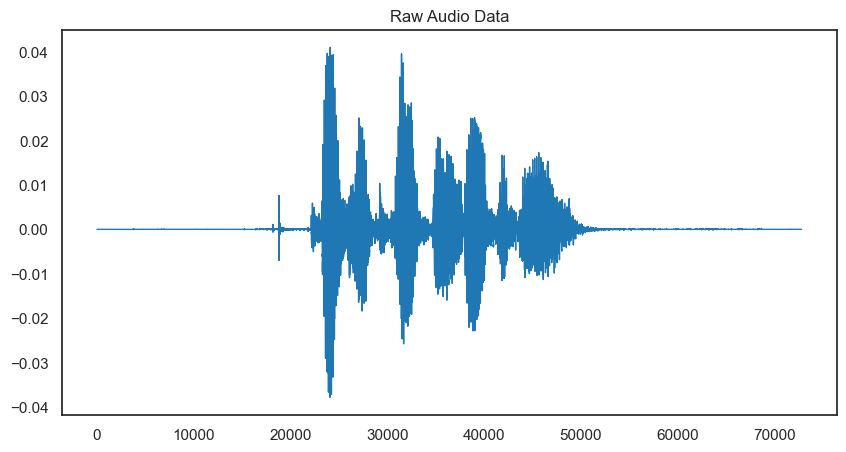

In [13]:
# 시계열그림
pd.Series(음성자료).plot(figsize = (10,5), lw = 1, title = 'Raw Audio Data', color = color_pal[0])
plt.show()

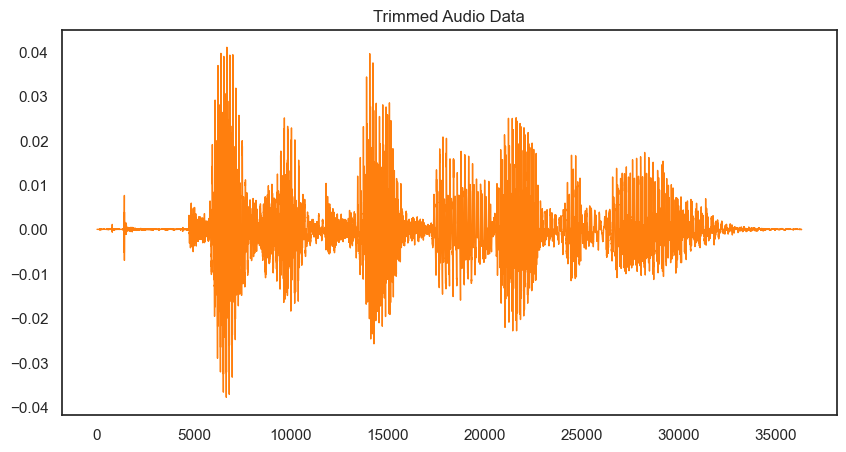

In [14]:
유의음성, _ = librosa.effects.trim(음성자료, top_db = 50)   # 불필요한 자료 자름
pd.Series(유의음성).plot(figsize = (10,5), lw = 1, title = 'Trimmed Audio Data', color = color_pal[1])
plt.show()

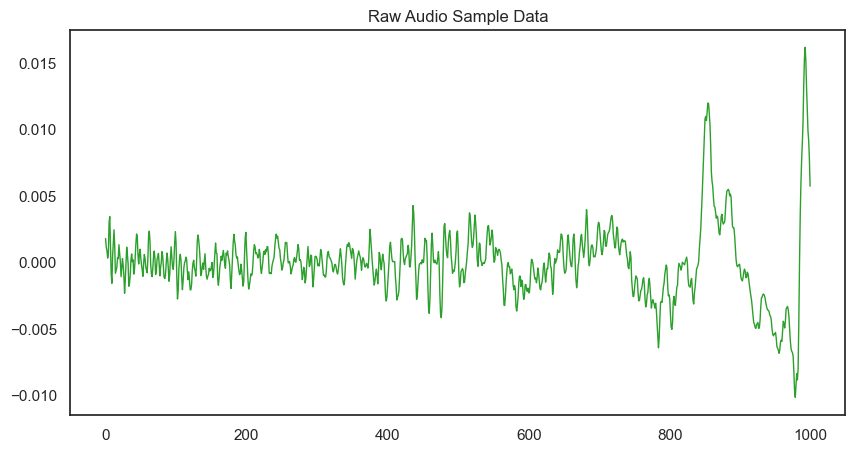

In [15]:
pd.Series(음성자료[30000:31000]).plot(figsize = (10,5), lw = 1, title = 'Raw Audio Sample Data', color = color_pal[2])
plt.show()

#### spectrogram
- 다양한 형태의 주파수 공간(frequency domain) 처리 방법이 사용됨
- MP3에서는 DCT와 IDCT를 통해 인코딩, 디코딩 수행

In [18]:
# stft: a single in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows
# amplitute_to_db: Convert an amplitude spectrogram to dB-scaledspectrogram
변환자료 = librosa.stft(음성자료)
변환dB = librosa.amplitude_to_db(np.abs(변환자료), ref = np.max)
변환dB.shape

(1025, 143)

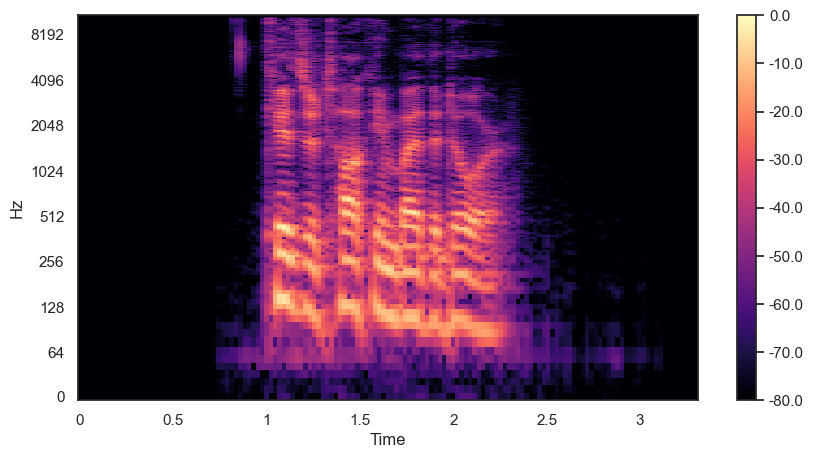

In [19]:
# plot the transformed audio data
fig, ax = plt.subplots(figsize = (10, 5))
이미지 = librosa.display.specshow(변환dB, x_axis = 'time', y_axis = 'log', ax = ax)
fig.colorbar(이미지, ax = ax, format = f'%0.1f')
plt.show()

In [21]:
# DCT, IDCT
from scipy.fft import fft, dct, ifft, idct
음성FFT = fft(음성자료).real
음성DCT = dct(음성자료, 1)
역음성FFT = ifft(음성FFT).real
역음성DCT = idct(음성DCT, 1)